In [1361]:
#!/usr/bin/env python

In [1362]:
"""Supervised Learning with Scikit-Learn I: Classification Models"""

'Supervised Learning with Scikit-Learn I: Classification Models'

# Lesson 8 Assignment

In [1363]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [1364]:
data = pd.read_csv('breastcancer.csv')

## 1. Perform Data exploratory analysis on the data. (10 points)

<table>
    <thead>
        <tr>
            <th>Variable</th>
            <th>Units</th>
        </tr>
    </thead>
    <tbody>
        <tr >
            <td>Age</td>
            <td>(years)</td>
        </tr>
        <tr >
            <td>BMI</td>
            <td>(kg/m2)</td>
        </tr>
        <tr >
            <td>Glucose</td>
            <td>(mg/dL)</td>
        </tr>
        <tr >
            <td>Insulin</td>
            <td>(µU/mL)</td>
        </tr>
        <tr >
            <td>HOMA</td>
            <td></td>
        </tr>
        <tr >
            <td>Leptin</td>
            <td>(ng/mL)</td>
        </tr>
        <tr >
            <td>Adiponectin</td>
            <td>(µg/mL)</td>
        </tr>
        <tr >
            <td>Resistin</td>
            <td>(ng/mL)</td>
        </tr>
        <tr>
            <td>MCP-1(pg/dL)</td>
            <td>(ng/mL)</td>
        </tr>
        <tr>
            <td>Classification</td>
            <td>1 = Healthy Controls, 2 = Patients</td>
        </tr>
    </tbody>
</table>

The data consists of 9 columns with various medical data about individuals. These columns all help predict whether the individual is a breast cancer patient or a healthy individual. The final column named `Classification` indicates whether the individual is healthy or a patient with the label 1 or 2, respectively. I will be using various supervised learning models to predict classification for this data.

In [1365]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


By looking at the first five records in the data, we see that all the predictor columns are float types except `Age` and `Glucose`, which are integer types. 

In [1366]:
data.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

There is a small imbalance amongst both classes with a majority of patients present in the data.

In [1367]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


Based on the descriptive statistics, there are 116 observations in the data. I notice that `MCP.1` has a very wide spread in comparison to the other columns with a standard deviation of 345.9. I will explore histograms of each column to dive into their distributions more.

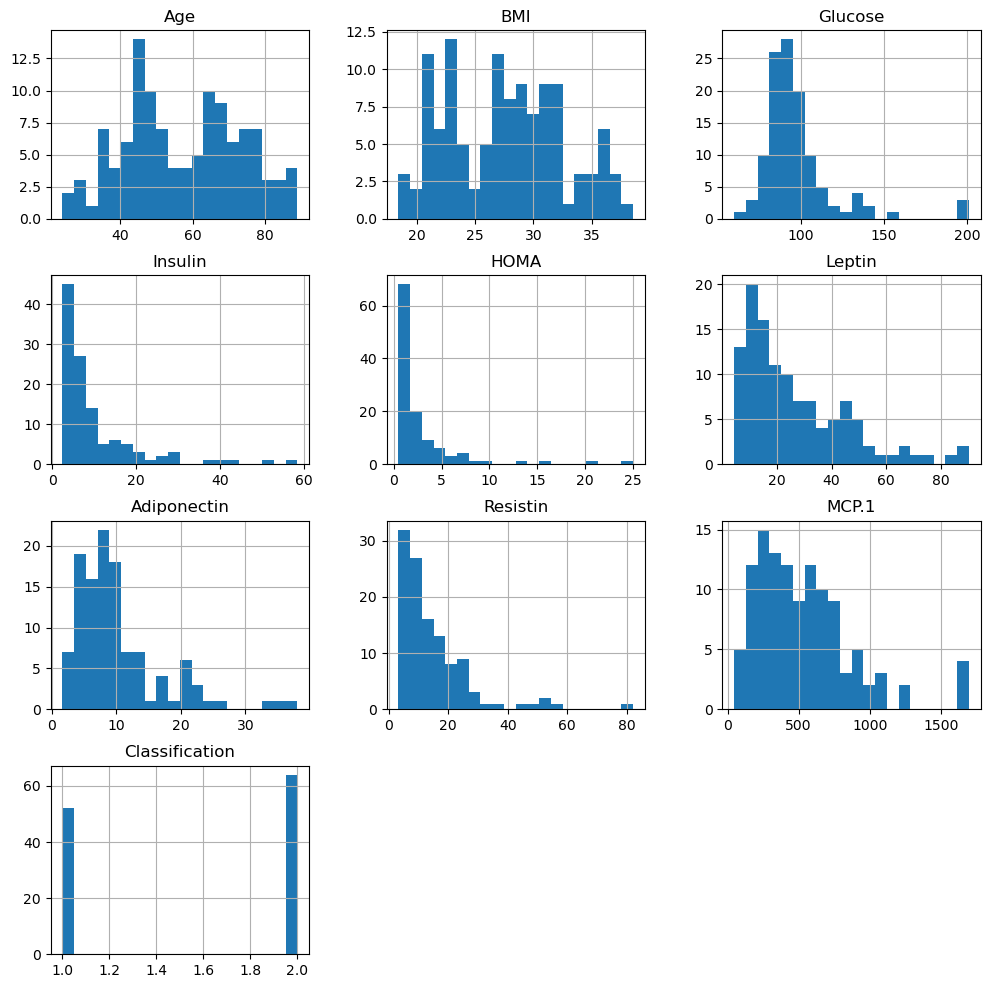

In [1368]:
data.hist(figsize=(12,12),bins=20)
plt.show()

All columns except `Age` and `BMI` appear to be positively skew to some extent. There are many observations from people aged between 40 and 50. The most positively skewed column is `Resistin` with an overwhelming majority of lower values. 

In [1369]:
data[data.isnull().any(axis=1)]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification


There doesn't appear to be any null values in the data.

Text(0.5, 0, 'Predicted Label')

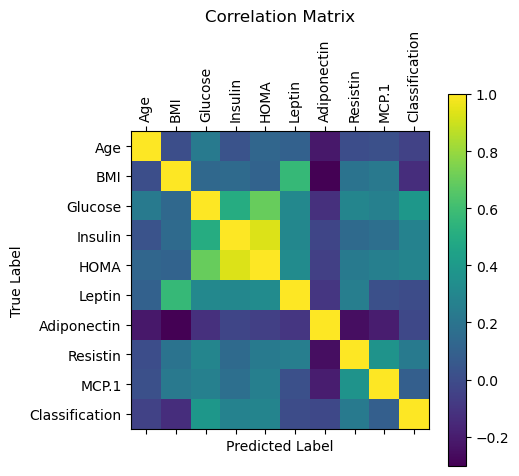

In [1370]:
plt.matshow(data.corr())
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(10), list(data.columns), rotation=90)
plt.yticks(range(10), list(data.columns))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


The variables `Glucose`, `Insulin`, and `HOMA` all seem to be highly correlated with each other. `Leptin` and `BMI` also appear to be strongly correlated. Contrastly, `Adiponectin` seems to have little to no correlation with most variables.

## 2. Use 30% of data as the test set and build a Logistic regression model to predict Labels variable. (20 points)

In [1371]:
X = data.iloc[:, 0:9]
y = data.Classification

First, I seperate the predictor variables from the labels and store them as `X` and `y`, respectively. 

In [1372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

Next, I use `train_test_split` to allocate 30% of the X and y data for testing and the remainder for training.

In [1373]:
lr = LogisticRegression()

Then, I initiate the `LogisticRegression` model as lr.

In [1374]:
lr.fit(X_train, y_train)

/Users/chenesegray/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1375]:
lr_test_pred = lr.predict(X_test)
accuracy_score(y_test, lr_test_pred)

0.7142857142857143

Finally, I fit the model using the training data, the predicted the labels of the testing data using trained model. The model predicted the data with 71% accuracy.

## 3. Build the Naïve Bayes model to predict Labels variable. (20 points)

In [1376]:
nb = GaussianNB()

In [1377]:
nb.fit(X_train, y_train)

GaussianNB()

In [1378]:
nb_test_pred = nb.predict(X_test)
accuracy_score(y_test, nb_test_pred)

0.7428571428571429

I repeated the same steps I used to generate and train the logistic regression model to generate and train the Naïve Bayes model. The model predicted the labels of the testing data with 74% accuracy.

## 4. Build the Decision tree model to predict Labels variable. (20 points)

In [1379]:
dt = DecisionTreeClassifier(max_depth=15, random_state=19)

In [1380]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=19)

In [1381]:
dt_test_pred = dt.predict(X_test)
accuracy_score(y_test, dt_test_pred)

0.7714285714285715

I repeated the same steps I used to generate and train the logistic regression and Naïve Bayes models to generate and train the decision tree classifier model. The model predicted the labels of the testing data with 77% accuracy.

## 5. Build Neural network model to predict Labels variable. (20 points)

To build a neural network, we can follow the same steps used to build the previous classifiers. First, we must preprocess the data by rescaling the data with `MinMaxScaler`. I start by initializing a `MinMaxScaler()` object and transforming the training and testing X, while also fitting the training data. Once the data is rescaled. I can use the scaled data to fit and train the neural network.

In [1382]:
scaler = MinMaxScaler()

In [1383]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1384]:
X_train_scaled[:3]
X_test_scaled[:3]

array([[0.24615385, 0.6168875 , 0.44274809, 0.79911709, 0.51905619,
        0.31089695, 0.13094343, 0.27583785, 0.35847699],
       [0.78461538, 0.22910858, 0.09923664, 0.05103074, 0.02222806,
        0.14907699, 0.28842506, 0.07463278, 0.16486718],
       [0.15384615, 0.29058807, 0.16793893, 0.39016241, 0.18129723,
        0.1445207 , 0.58620325, 0.17027764, 0.26389132]])

In [1385]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 3), random_state=17)

In [1386]:
nn.fit(X_train_scaled, y_train)

/Users/chenesegray/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 3), random_state=17,
              solver='lbfgs')

In [1387]:
nn_test_pred = nn.predict(X_test_scaled)
accuracy_score(y_test, nn_test_pred)

0.7714285714285715

After training the model, I used the neural network model to predict the labels of the test data, which yielded an accuracy score of 77%.

## 6. Which model is the best? Which variable is the most important one? (10 points)

In [1388]:
def model_eval(y_test, model_pred):
    """prints classification report, confusion matrix and Cohen's kappa score for input model"""
    print('Classification Report')
    print(classification_report(y_test, model_pred, target_names=['Healthy Controls', 'Patients']))
    print('\n')
    print('Confusion Matrix')
    print(pd.DataFrame(confusion_matrix(y_test, model_pred), index=['Healthy Controls Act', 'Patients Act'], columns=['Healthy Controls Pred', 'Patients Pred']))
    print('\n')
    print('Cohen\'s kappa score:', round(cohen_kappa_score(y_test, model_pred), 4))

In [1389]:
y_preds = {'Logistic Regression': lr_test_pred, 
           'Naive Bayes': nb_test_pred, 
           'Decision Tree': dt_test_pred, 
           'Neural Network': nn_test_pred}

def plot_roc_curve(true_y, y_probs):
    """plots the roc curve based of the probabilities"""
    for y_pred in y_probs.keys():
        fpr, tpr, thresholds = roc_curve(true_y, y_probs[y_pred], pos_label=1)
        auc = round(roc_auc_score(y_test, y_probs[y_pred]), 4)
        plt.plot(fpr,tpr,label=f"{y_pred}, AUC="+str(auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

To evaluate which model performs best, I define a helper function `model_eval` that returns the classification report, confusion matrix and Cohen's kappa score for the model and test data input to the function. I also defined a helper function `plot_roc_curve` that returns a plot with an ROC curve for each model. I created a dictionary with the name of each model as keys and their prediction values as their respective values to assist with plotting the ROC curves.

### Logistic Regression (LR) Evaluation

In [1390]:
model_eval(y_test, lr_test_pred)

Classification Report
                  precision    recall  f1-score   support

Healthy Controls       0.59      0.77      0.67        13
        Patients       0.83      0.68      0.75        22

        accuracy                           0.71        35
       macro avg       0.71      0.73      0.71        35
    weighted avg       0.74      0.71      0.72        35



Confusion Matrix
                      Healthy Controls Pred  Patients Pred
Healthy Controls Act                     10              3
Patients Act                              7             15


Cohen's kappa score: 0.4243


### Naive Bayes (NB) Evaluation

In [1391]:
model_eval(y_test, nb_test_pred)

Classification Report
                  precision    recall  f1-score   support

Healthy Controls       0.60      0.92      0.73        13
        Patients       0.93      0.64      0.76        22

        accuracy                           0.74        35
       macro avg       0.77      0.78      0.74        35
    weighted avg       0.81      0.74      0.75        35



Confusion Matrix
                      Healthy Controls Pred  Patients Pred
Healthy Controls Act                     12              1
Patients Act                              8             14


Cohen's kappa score: 0.5039


### Decision Tree (DT) Evaluation

In [1392]:
model_eval(y_test, dt_test_pred)

Classification Report
                  precision    recall  f1-score   support

Healthy Controls       0.69      0.69      0.69        13
        Patients       0.82      0.82      0.82        22

        accuracy                           0.77        35
       macro avg       0.76      0.76      0.76        35
    weighted avg       0.77      0.77      0.77        35



Confusion Matrix
                      Healthy Controls Pred  Patients Pred
Healthy Controls Act                      9              4
Patients Act                              4             18


Cohen's kappa score: 0.5105


In [1393]:
pd.DataFrame({'variable': data.columns[:9], 
              'importance': dt.feature_importances_})

,variable,importance
0,Age,0.067371
1,BMI,0.282120
2,Glucose,0.248785
3,Insulin,0.042814
4,HOMA,0.000000
5,Leptin,0.084208
6,Adiponectin,0.047619
7,Resistin,0.227082
8,MCP.1,0.000000


### Neural Network (NN) Evaluation

In [1394]:
model_eval(y_test, nn_test_pred)

Classification Report
                  precision    recall  f1-score   support

Healthy Controls       0.65      0.85      0.73        13
        Patients       0.89      0.73      0.80        22

        accuracy                           0.77        35
       macro avg       0.77      0.79      0.77        35
    weighted avg       0.80      0.77      0.78        35



Confusion Matrix
                      Healthy Controls Pred  Patients Pred
Healthy Controls Act                     11              2
Patients Act                              6             16


Cohen's kappa score: 0.5395


#### Discussion


As stated earlier in our model evaluation, the NN and DT models predict the correct label 77% of the time while the LR and NB models predict the label correctly 71% and 74% of the time, respectively. As for the Choen's Kappa score, the scores for each model range between .40 and .55, indicating each model predicts labels better than a random classifier would, but there isn't perfect agreement between the true labels and the predicted labels. The most agreement between predicted and actual labels came from the NN model, with a score of .5395. Since we are interested in predicting whether an individual has breast cancer or not, I will focus on the precision, recall and f1-scores for patients. Before I begin, one thing to note is that for each class label 1 and 2, the DT model yielded the same value for all three metrics, .69 and .82, respectively. This tells us the DT model predicted the same amount of false negatives and false positives. I notice the NB yieled the highest precision and the lowest recall for the patient class (.93 and .64, .29 difference). This indicates the NB model is cautious in its predictions. It's confident about the few positive instances it predicts but might miss a substantial number of actual positives. As for F1 scores, the highest F1 score (besides the DT model because precision and recall are equal) was yielded by the NN model (.80), indicating that that model can concurrently achieve high precision and recall scores better than other models.

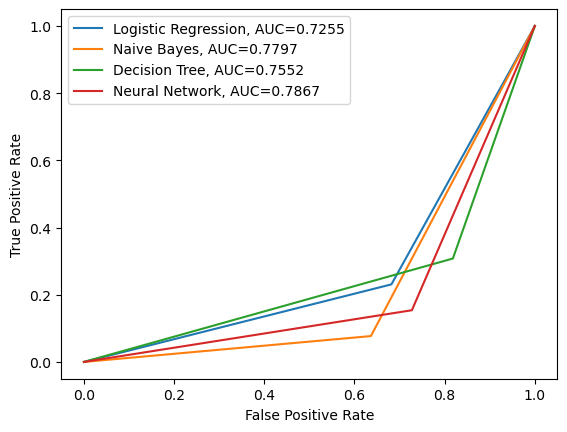

In [1395]:
plot_roc_curve(y_test, y_preds)

Considering that in the context of the ROC curve, a good model would have more curvature near the top left corner of the plot, none of the model appear to perform a lot better than any of the other models. The NN model has the highest AUC score (.7867), indicating that it has the  best ability to seperate the two classes.

Based on our evaluation, it appears that the NN model does best at predicting whether an individual has breast cancer or not. Our feature importance evaluation indicates that `BMI` is the most important variable.